In [1]:
%matplotlib inline
from pyqubo import Spin, Vector, Param, solve_ising, Constraint
import matplotlib.pyplot as plt
import networkx as nx

## Graph Partitioning Problem

Partition a graph into two equal size parts such that the number of divided edges are minimized. Ising formulation of this problem is represented as

$$
H(s) = \alpha H_{A}(s) + H_{B}(s)\\
H_{A}(s) = \left( \sum_{i \in V} s_{i}\right )^2\\
H_{B}(s) = \sum_{(i, j) \in E} \frac{1-s_{i}s_{j}}{2}
$$

$H_{A}(s)$ is a constraint that two graph has equal number of nodes. $H_{B}(s)$ is the number of divided edges. $\alpha$ is a penalty strength.

In [54]:
def plot_graph(E, colors=None):
    G = nx.Graph()
    for (i, j) in E:
        G.add_edge(i, j)
    plt.figure(figsize=(4,4))
    pos = nx.spring_layout(G)
    if colors:
        nx.draw_networkx(G, pos, node_color=[colors[node] for node in G.nodes])
    else:
        nx.draw_networkx(G, pos)
    plt.axis("off")
    plt.show()

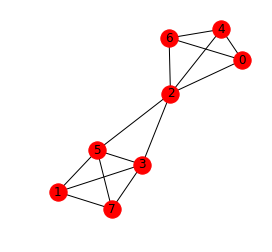

In [ ]:
# Following edges are given
E = {(0, 6), (2, 4), (7, 5), (0, 4), (2, 0),
     (5, 3), (2, 3), (2, 6), (4, 6), (1, 3),
     (1, 5), (7, 1), (7, 3), (2, 5)}
plot_graph(E)

Prepare a vector with 8 dimension. Each spin represents which group it belongs to.

In [56]:
# Define spin vector
s = Vector("s", 8, spin=True)

# Define parameter alpha
a = Param("alpha")

In [57]:
# Define hamiltonian H_{A}
HA =Constraint(sum(s) ** 2, "num_nodes")

# Define hamiltonian H_{B}
HB = sum((1.0 - s[i]*s[j]) / 2.0 for (i, j) in E)

H = a * HA + HB

In [58]:
# Compile model
model = H.compile()

# Create Ising model with alpha = 0.1
params={'alpha': 0.1}
linear, quad, offset = model.to_ising(params=params)

In [62]:
# Solve Ising model
solution = solve_ising(linear, quad)

# Decode solution
decoded_sol, broken, energy = model.decode_solution(solution, vartype="SPIN", params=params)
print("#broken constraints: {}".format(len(broken)))

#broken constraints: 0


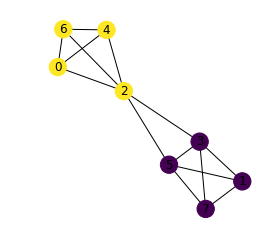

In [63]:
# Plot graph
plot_graph(E, [solution[k]+1 for k in sorted(solution.keys())])